In [78]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
from torch.utils.data import DataLoader

from google.colab import files
import io
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings(action='ignore')

In [79]:
# import the Titanic dataset as a training dataset
uploaded = files.upload()

Saving train.csv to train (2).csv


In [80]:
#We will use 'Survived' feature as a class(y) but there is no 'Survived' feature in test.csv.
#So Split the train data into train and test data.

train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
train, test = train_test_split(train, test_size = 0.3, random_state = 55)

##Data Observation ##

In [81]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.0,0,0,STON/O 2. 3101292,7.9250,NaN,S
209,210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0000,A31,C
756,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.0,0,0,350042,7.7958,NaN,S
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C
499,500,0,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,NaN,S


In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 636 to 461
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Survived     623 non-null    int64  
 2   Pclass       623 non-null    int64  
 3   Name         623 non-null    object 
 4   Sex          623 non-null    object 
 5   Age          493 non-null    float64
 6   SibSp        623 non-null    int64  
 7   Parch        623 non-null    int64  
 8   Ticket       623 non-null    object 
 9   Fare         623 non-null    float64
 10  Cabin        144 non-null    object 
 11  Embarked     622 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 63.3+ KB


In [83]:
#There are no survived feature since this is the test data!
#test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
#test.head(5)

In [84]:
print(f'number of train data: {len(train)}, number of test data: {len(test)}')

number of train data: 623, number of test data: 268


In [85]:
#Observe a null value
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            130
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          479
Embarked         1
dtype: int64

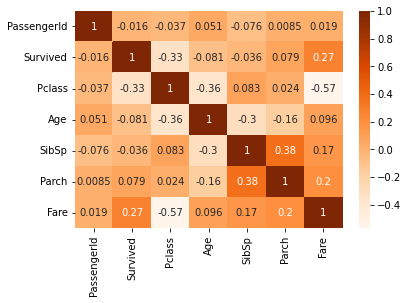

In [86]:
#You can see the correlation coefficient of features.
sns.heatmap(train.corr(), annot = True, cmap='Oranges')

##Data preprocessing##

In [87]:
#We dropped Cabin, name, ticket features because there are many null values and it's correlation with survived feature is low
train.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)

#We filled the null value of Embarked data with the most frequently used data
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)


In [88]:
# We filled the null value of age divided with the pclass. pclass and age has high correlation shown on the heatmap above! 
train['Age'].fillna(10000, inplace=True)
train.loc[(train['Pclass'] == 1) & (train['Age'] == 10000), 'Age'] = train.loc[(train['Pclass'] == 1) & (train['Age']!= 10000)]['Age'].mean()
train.loc[(train['Pclass'] == 2) & (train['Age'] == 10000), 'Age'] = train.loc[(train['Pclass'] == 2) & (train['Age']!= 10000)]['Age'].mean()
train.loc[(train['Pclass'] == 3) & (train['Age'] == 10000), 'Age'] = train.loc[(train['Pclass'] == 3) & (train['Age']!= 10000)]['Age'].mean()

In [89]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [90]:
#This is a code that changes the object feature to a number(It was used in previous lecture).
# train['Sex'] = train["Sex"].replace({"male" : 0})
# train['Sex'] = train["Sex"].replace({"female" : 1})

##One-hot encoding

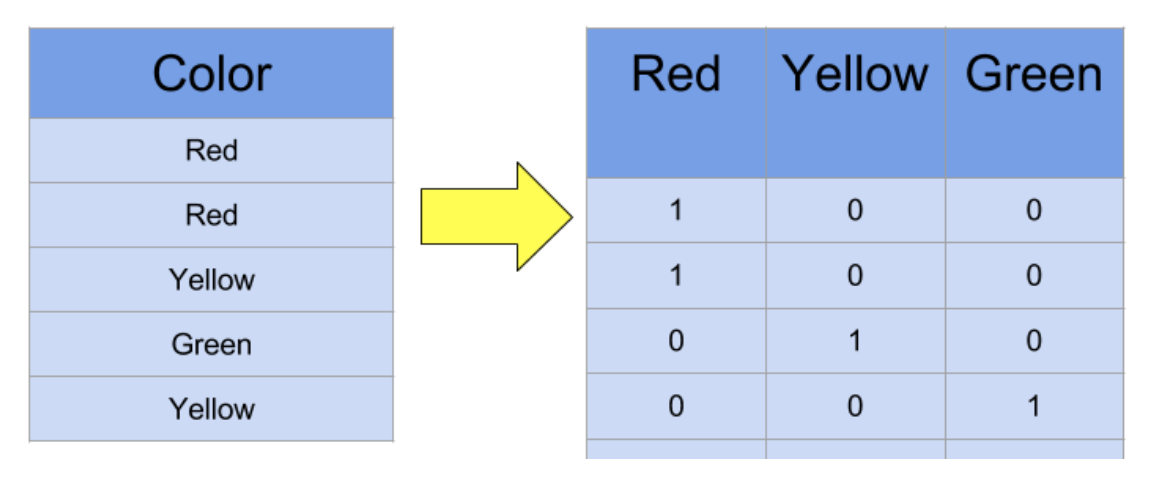

In [91]:
#one hot encoding
train = pd.get_dummies(train, columns = ['Sex'])
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
636,0,3,32.00000,0,0,7.9250,S,0,1
209,1,1,40.00000,0,0,31.0000,C,0,1
756,0,3,28.00000,0,0,7.7958,S,0,1
291,1,1,19.00000,1,0,91.0792,C,1,0
499,0,3,24.00000,0,0,7.7958,S,0,1
...,...,...,...,...,...,...,...,...,...
823,1,3,27.00000,0,1,12.4750,S,1,0
541,0,3,9.00000,4,2,31.2750,S,1,0
295,0,1,38.96736,0,0,27.7208,C,0,1
666,0,2,25.00000,0,0,13.0000,S,0,1


# Problem 1 (10 point)#

Which is more appropriate, one hot encoding or changing object to a number, when preprocessing an object feature? why?\
Apply one-hot encoding to feature 'Embarked', as applied to feature 'Sex'.


In [139]:
#Because there are just few categories, One hot encoding is more appropriate
train = pd.get_dummies(train, columns = ['Embarked'])

In [93]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
636,0,3,32.00000,0,0,7.9250,0,1,0,0,1
209,1,1,40.00000,0,0,31.0000,0,1,1,0,0
756,0,3,28.00000,0,0,7.7958,0,1,0,0,1
291,1,1,19.00000,1,0,91.0792,1,0,1,0,0
499,0,3,24.00000,0,0,7.7958,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
823,1,3,27.00000,0,1,12.4750,1,0,0,0,1
541,0,3,9.00000,4,2,31.2750,1,0,0,0,1
295,0,1,38.96736,0,0,27.7208,0,1,1,0,0
666,0,2,25.00000,0,0,13.0000,0,1,0,0,1


In [94]:
#min max scailing
min_age, max_age = train['Age'].min(), train['Age'].max()
min_fare, max_fare = train['Fare'].min(), train['Fare'].max()
min_pclass, max_pclass = train['Pclass'].min(), train['Pclass'].max()
train['Age'] = (train['Age'] - min_age) / (max_age  - min_age)
train['Fare'] = (train['Fare'] - min_fare) / (max_fare - min_fare)
train['Pclass'] = (train['Pclass'] -min_pclass) / (max_pclass - min_pclass)

In [95]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
636,0,1.0,0.427247,0,0,0.015469,0,1,0,0,1
209,1,0.0,0.536343,0,0,0.060508,0,1,1,0,0
756,0,1.0,0.372699,0,0,0.015216,0,1,0,0,1
291,1,0.0,0.249966,1,0,0.177775,1,0,1,0,0
499,0,1.0,0.318151,0,0,0.015216,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
823,1,1.0,0.359062,0,1,0.024350,1,0,0,0,1
541,0,1.0,0.113596,4,2,0.061045,1,0,0,0,1
295,0,0.0,0.522260,0,0,0.054107,0,1,1,0,0
666,0,0.5,0.331788,0,0,0.025374,0,1,0,0,1


In [96]:
x_train = train.drop(['Survived'], axis = 1) # survive value를 제외한 모든 data
y_train = train['Survived']


##Test Data Preprocessing##

In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 713 to 232
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  268 non-null    int64  
 1   Survived     268 non-null    int64  
 2   Pclass       268 non-null    int64  
 3   Name         268 non-null    object 
 4   Sex          268 non-null    object 
 5   Age          221 non-null    float64
 6   SibSp        268 non-null    int64  
 7   Parch        268 non-null    int64  
 8   Ticket       268 non-null    object 
 9   Fare         268 non-null    float64
 10  Cabin        60 non-null     object 
 11  Embarked     267 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 27.2+ KB


In [98]:
#Observe a null value
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             47
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          208
Embarked         1
dtype: int64

##Problem 2 (10 point)##

Preprocess the test data with the same way we applied it to the train data.\
(You should use the min, max value of train data(like variables 'miin_age', 'max_age'))

In [99]:
#We do the same data processing to the test dataset
#This is answer
test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace = True)
test['Age'].fillna(10000, inplace=True)
test.loc[(test['Pclass'] == 1) & (test['Age'] == 10000), 'Age'] = test.loc[(test['Pclass'] == 1) & (test['Age']!= 10000)]['Age'].mean()
test.loc[(test['Pclass'] == 2) & (test['Age'] == 10000), 'Age'] = test.loc[(test['Pclass'] == 2) & (test['Age']!= 10000)]['Age'].mean()
test.loc[(test['Pclass'] == 3) & (test['Age'] == 10000), 'Age'] = test.loc[(test['Pclass'] == 3) & (test['Age']!= 10000)]['Age'].mean()

test = pd.get_dummies(test, columns = ['Sex'])
test = pd.get_dummies(test, columns = ['Embarked'])

min_age, max_age = test['Age'].min(), test['Age'].max()
min_fare, max_fare = test['Fare'].min(), test['Fare'].max()
min_pclass, max_pclass = test['Pclass'].min(), test['Pclass'].max()
test['Age'] = (test['Age'] - min_age) / (max_age  - min_age)
test['Fare'] = (test['Fare'] - min_fare) / (max_fare - min_fare)
test['Pclass'] = (test['Pclass'] -min_pclass) / (max_pclass - min_pclass)

x_test = test.drop(['Survived'], axis=1)
y_test = test['Survived']

In [101]:
test.info()
x_test.info()
y_test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 713 to 232
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    268 non-null    int64  
 1   Pclass      268 non-null    float64
 2   Age         268 non-null    float64
 3   SibSp       268 non-null    int64  
 4   Parch       268 non-null    int64  
 5   Fare        268 non-null    float64
 6   Sex_female  268 non-null    uint8  
 7   Sex_male    268 non-null    uint8  
 8   Embarked_C  268 non-null    uint8  
 9   Embarked_Q  268 non-null    uint8  
 10  Embarked_S  268 non-null    uint8  
dtypes: float64(3), int64(3), uint8(5)
memory usage: 16.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 713 to 232
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      268 non-null    float64
 1   Age         268 non-null    float64
 2   SibSp       268 non-nul

713    0
726    1
262    0
266    0
186    1
      ..
491    0
407    1
257    1
130    0
232    0
Name: Survived, Length: 268, dtype: int64

In [102]:
import torch
from torch.utils.data import DataLoader, TensorDataset


In [103]:
# Prepare your data for training with DataLoaders
x_train = torch.tensor(x_train.to_numpy(), dtype=torch.float32) # we can also use torch.from_numpy(x_train)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
y_train = y_train.reshape(-1,1) # -1 is used only once to indicate the remainder. ex) (24, 1) --> (-1, 4, 3) ==> -1 becomes 2
x_test = torch.tensor(x_test.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32)
y_test = y_test.reshape(-1,1)

## MLP structure

![tigure](https://ifh.cc/g/LlW8bX.jpg)

### Weight1 --> shape: 3*4
### Weight2 --> shape: 4*1

In [104]:
# Pytorch already implemented the simple feed forward network called "Linear"
#Input->Hidden
MLP1 = torch.nn.Linear(3,4)     #nn.Linear(input_dim, output_dim)
MLP1.weight, MLP1.bias

(Parameter containing:
 tensor([[-0.5224, -0.2313,  0.2248],
         [-0.1946,  0.2308,  0.1769],
         [ 0.1108,  0.4956, -0.4298],
         [-0.5304, -0.1310,  0.3796]], requires_grad=True),
 Parameter containing:
 tensor([-0.4306, -0.5624, -0.1071,  0.1983], requires_grad=True))

In [105]:
#Hidden->Output
MLP2 = torch.nn.Linear(4,1)
MLP2.weight, MLP2.bias

(Parameter containing:
 tensor([[ 0.2914,  0.2921, -0.2845,  0.4342]], requires_grad=True),
 Parameter containing:
 tensor([-0.4941], requires_grad=True))

In [106]:
x = torch.tensor([1., 0., 1.])
target = torch.tensor(0.5)
## Pytorch has famous many used loss function and optimization
optim = torch.optim.SGD([MLP1.weight, MLP2.weight], lr=0.1)
loss_func = torch.nn.MSELoss() # Mean Squared Error
y = MLP1(x)
y = torch.nn.functional.sigmoid(y)
y = MLP2(y)
y = torch.nn.functional.sigmoid(y)
print("y value before update : ", y)
for i in range(10000):
  y = MLP1(x)
  y = torch.nn.functional.sigmoid(y)
  y = MLP2(y)
  y = torch.nn.functional.sigmoid(y)
  loss = loss_func(y, target)
  # pytorch automaticaaly calculates the gradient and applies EBP(Error Back Propagation)
  optim.zero_grad()     #zero_grad() function is making the gradient zero..this time is for initialization
  loss.backward()          #pytorch automatically calculates the gradient
  optim.step()          #update the weights
check_y = MLP1(x)
check_y = torch.nn.functional.sigmoid(check_y)
check_y = MLP2(check_y)
check_y = torch.nn.functional.sigmoid(check_y)
MLP1.weight, MLP2.weight, check_y
#Weight of MLP1 layer and MLP2 layer has changed
#y value after update has changed to the target value



y value before update :  tensor([0.4540], grad_fn=<SigmoidBackward0>)


(Parameter containing:
 tensor([[-0.5036, -0.2313,  0.2435],
         [-0.1747,  0.2308,  0.1968],
         [ 0.0965,  0.4956, -0.4440],
         [-0.4987, -0.1310,  0.4114]], requires_grad=True),
 Parameter containing:
 tensor([[ 0.3753,  0.3846, -0.1848,  0.5665]], requires_grad=True),
 tensor([0.5000], grad_fn=<SigmoidBackward0>))

### Customizing our Own layer
##### Pytorch provides class to customize our own layer

In [107]:
class Two_layer(torch.nn.Module): # we inherited the torch module class
# we have to define __init__ function and forward function
  def __init__(self):
    super(Two_layer, self).__init__()
    # Initialize the layers 
    self.MLP1 = torch.nn.Linear(3, 4)
    self.MLP2 = torch.nn.Linear(4, 1)

  def forward(self, x): # x will be the input data
    y = self.MLP1(x)
    y = torch.nn.functional.sigmoid(y)
    y = self.MLP2(y)
    y = torch.nn.functional.sigmoid(y)
    return y

In [108]:
model = Two_layer()
x = torch.tensor([1., 0., 1.])
target = torch.tensor(0.5)
## Pytorch implemented famous many used loss function and optimization
optim = torch.optim.SGD(model.parameters(), lr=0.1) # .parameters() contain all the learnable parameters on model defined on __init__ function
loss_func = torch.nn.MSELoss()
for i in range(10000):
  y = model(x)
  loss = loss_func(target, y)
  optim.zero_grad()
  loss.backward()
  optim.step()
check_y = model(x)
check_y

tensor([0.5000], grad_fn=<SigmoidBackward0>)

#### Problem 3 (10 point)
##### Make your own layer class to solve the XOR problem
##### Define the structure as shown in the below figure
##### 2-dim input (figure contains bias as 1), 2-dim hidden, 1-dim output, 

![Figure](https://ifh.cc/g/meTJ3n.jpg)

In [118]:
class XOR_layer(torch.nn.Module):
  def __init__(self):
    super(XOR_layer, self).__init__()
    ## define your own layers!
    self.MLP1 = torch.nn.Linear(2, 2)
    self.MLP2 = torch.nn.Linear(2, 1)

  def forward(self, x):
    # define the forward function
    y = self.MLP1(x)
    y = torch.nn.functional.sigmoid(y)
    y = self.MLP2(y)
    return y

In [119]:
model = XOR_layer()
loss_func = torch.nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=0.1) 
### define x and target data
### for example, if x = [0, 0] --> target =[0]
### x = [1, 0] --> target = [1]
### make 4 input as one input data
### for example, x = [[0,0], [1,0]] is 2 input data
x = torch.tensor([[0.,0.], [1.,0.], [0.,1.], [1.,1.]])
target = torch.tensor([[0.], [1.], [1.], [0.]])
for i in range(30000): # choose your own number of epochs
  y = model(x)
  loss = loss_func(target, y)
  optim.zero_grad()
  loss.backward()
  optim.step()
check_y = model(x)
check_y

tensor([[1.6689e-06],
        [9.9999e-01],
        [9.9999e-01],
        [8.1062e-06]], grad_fn=<AddmmBackward0>)

### What we just did is something strange. We gave answers to the models and checked by questioning the same question.
### What our model wants to do is to adapt to newly asked questions!
#### We should make train dataset and test dataset! 
#### We use train dataset only for training and evaluate our model with test dataset

In [111]:
# from sklearn.model_selection import train_test_split # We used train_test split function implemented by scikit-learn library
# X_train, X_test, Y_train, Y_test = train_test_split(
#      x_train, y_train, test_size=0.2, random_state=42) # We divide the data into 8:2

train = TensorDataset(x_train, y_train)
train_dataloader = DataLoader(train, batch_size = 64, shuffle=True)
test = TensorDataset(x_test, y_test)
test_dataloader = DataLoader(test, batch_size = 64, shuffle=False)


In [112]:
for i, data in enumerate(train_dataloader): # we can use the batch data like this!
  x, y = data
  print(x.shape, y.shape)
  break

torch.Size([64, 10]) torch.Size([64, 1])


### Finally, let's apply Feed Forward Network on our titanic data

##### For the classification dataset, we can't use MSE as our loss function.
##### Therefore, we use the Cross Entropy Loss function
![CEL](https://pbs.twimg.com/media/FBmVmdHWQAAU7gq.png)

$Y_i$ is the target value and $\hat{Y_i}$ is the predicted value of the model

In [113]:
x_train.shape # as we can see, there are 10 input features(dimensions)

torch.Size([623, 10])

In [114]:
loss_func = torch.nn.BCELoss() # Pytorch already implemented Cross Entropy Loss for us, BCELoss == Binary Cross Entropy Loss Function


### Problem 4 (10 point)
##### Make your own class again to apply the titanic data
##### Please define more than 1 hidden layers

In [137]:
class Titanic_layer(torch.nn.Module):
  def __init__(self):
    super(Titanic_layer, self).__init__()
    ## define your own layers! # Two or one hidden layer is recommended
    self.MLP1 = torch.nn.Linear(10, 8)
    self.MLP2 = torch.nn.Linear(8, 5)
    self.MLP_last = torch.nn.Linear(5, 1)

  def forward(self, x):
    # define the forward function
    y = self.MLP1(x)
    y = torch.nn.functional.sigmoid(y)
    y = self.MLP2(y)
    y = torch.nn.functional.sigmoid(y)
    y = self.MLP_last(y)
    y = torch.nn.functional.sigmoid(y)
    return y

In [138]:
# If you defined our model, you can just run this cell and next cell to check the accuracy of your model
epoches =  1000      # please write your own epoch
model = Titanic_layer()
optim = torch.optim.SGD(model.parameters(), lr = 0.05)
batch_len = len(train_dataloader)
for epoch in range(1, epoches+1):
  mean_loss = 0
  for i, data in enumerate(train_dataloader):
    x, target = data
    x = torch.tensor(x, dtype=torch.float32)
    y = model(x)
    target = torch.tensor(target, dtype=torch.float32)
    loss = loss_func(y, target)
    mean_loss += loss
    optim.zero_grad()
    loss.backward()
    optim.step()
  mean_loss /= batch_len
  print(f'Epoch: {epoch}, Train Loss: {mean_loss}')


Epoch: 1, Train Loss: 0.23594006896018982
Epoch: 2, Train Loss: 0.23531723022460938
Epoch: 3, Train Loss: 0.23485246300697327
Epoch: 4, Train Loss: 0.2340078353881836
Epoch: 5, Train Loss: 0.23441863059997559
Epoch: 6, Train Loss: 0.23416748642921448
Epoch: 7, Train Loss: 0.23365235328674316
Epoch: 8, Train Loss: 0.2335285246372223
Epoch: 9, Train Loss: 0.23361468315124512
Epoch: 10, Train Loss: 0.2329975664615631
Epoch: 11, Train Loss: 0.2331969290971756
Epoch: 12, Train Loss: 0.23288071155548096
Epoch: 13, Train Loss: 0.23342788219451904
Epoch: 14, Train Loss: 0.23266804218292236
Epoch: 15, Train Loss: 0.2334398478269577
Epoch: 16, Train Loss: 0.23344533145427704
Epoch: 17, Train Loss: 0.23339787125587463
Epoch: 18, Train Loss: 0.23263821005821228
Epoch: 19, Train Loss: 0.23243756592273712
Epoch: 20, Train Loss: 0.23301009833812714
Epoch: 21, Train Loss: 0.23269572854042053
Epoch: 22, Train Loss: 0.23269808292388916
Epoch: 23, Train Loss: 0.23379667103290558
Epoch: 24, Train Loss: 0.

In [140]:
# sample code to check the accuracy of our test dataset
acc=0
total=0
for i, data in enumerate(test_dataloader):
    x, target = data
    x = x.type(torch.FloatTensor)
    y = model(x)
    target = target.reshape(-1, 1)
    target = target.type(torch.FloatTensor)
    real_y = (y>=0.5).float()
    acc += (real_y == target).float().sum()
    total += target.shape[0]
print(f'Mean Accuracy of test: {(acc/total).item()}')

Mean Accuracy of test: 0.7761194109916687


#### For more information about pytorch, you can visit pytorch Website
[pytorch](https://pytorch.org/)
#### Or pytorch github page
[github](https://github.com/pytorch/pytorch) 
##### For example, There are lots of activation function you can use (relu, tanh or else) and many different optimization function(adam, ...)
##### Please look at those more information and think about why there are different activation functions ( hint: It is related with the backpropagation)
